In [4]:
import numpy as np
from matplotlib.pyplot import subplots , cm
import sklearn.model_selection as skm
from ISLP import load_data , confusion_table

from sklearn.svm import SVC # Support Vector Machines für Klassifikationsprobleme
from ISLP.svm import plot as plot_svm
from sklearn.metrics import RocCurveDisplay

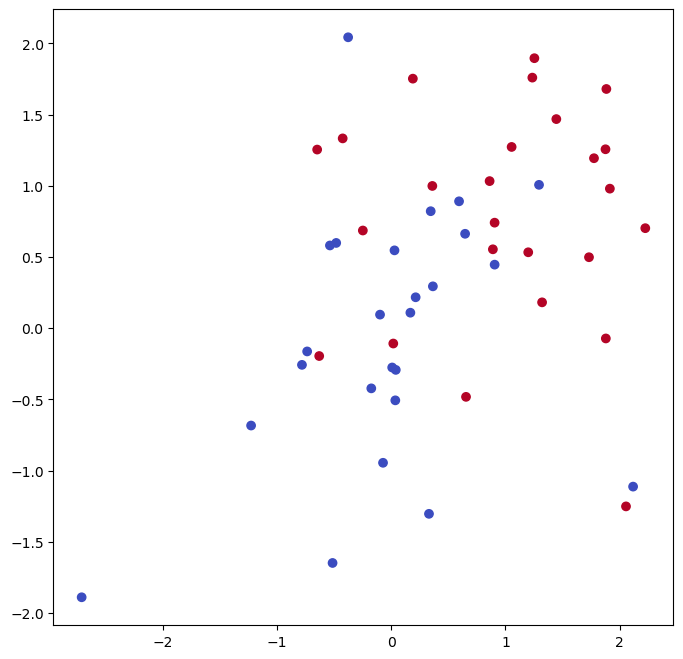

In [5]:
rng = np.random.default_rng(1) # rng: random number generator
X = rng.standard_normal((50, 2))
y = np.array([-1]*25+[1]*25)
X[y==1] += 1 # für Klasse 1 - alle Random numbers um 1 verschieben
fig, ax = subplots(figsize=(8,8))
ax.scatter(X[:,0],
X[:,1],
c=y,
cmap=cm.coolwarm);

In [6]:
# Fit eines Support Vector Classifiers mit lineare Entscheidungsgrenze (kernel=linear)
svm_linear = SVC(C=10, kernel='linear') # Cost of violation, mit einem kleinen C werden margins groß, mit großem C werden die margins klein.
svm_linear.fit(X, y)

SVC(C=10, kernel='linear')

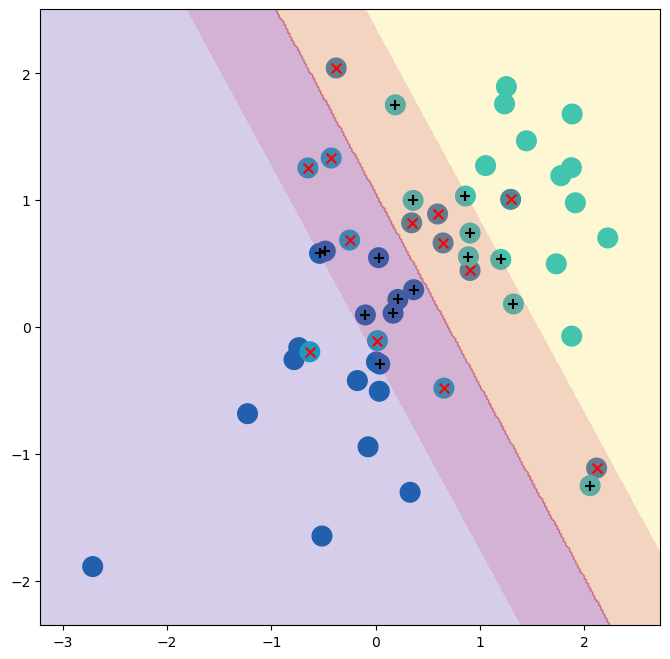

In [7]:
# Support Vektoren werden mit + gekennzeichnet.
fig, ax = subplots(figsize=(8,8))
plot_svm(X,
y,
svm_linear ,
ax=ax)

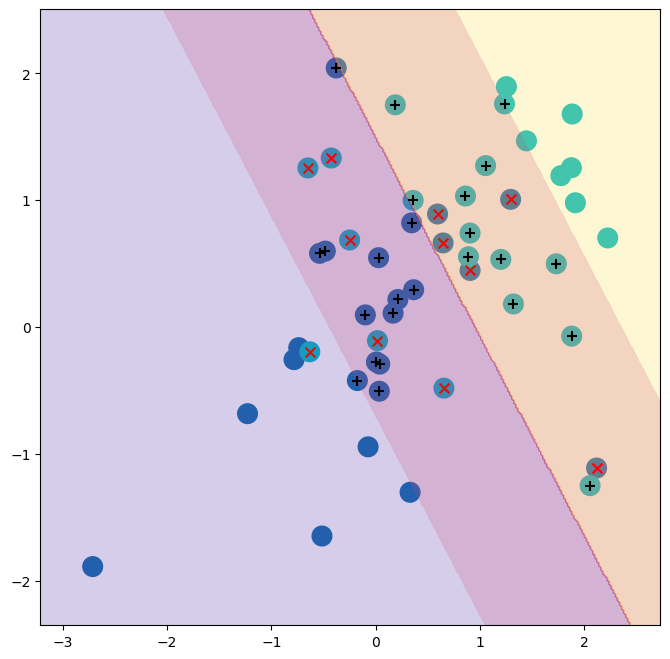

In [8]:
# Mit einem kleineren C wird die Entscheidungsgrenze größer
svm_linear_small = SVC(C=0.1, kernel='linear')
svm_linear_small.fit(X, y)
fig, ax = subplots(figsize=(8,8))
plot_svm(X,
y,
svm_linear_small ,
ax=ax)

In [9]:
svm_linear.coef_

array([[1.17303943, 0.77348227]])

In [10]:
kfold = skm.KFold(5,
random_state=0,
shuffle=True)
grid = skm.GridSearchCV(svm_linear ,
{'C':[0.001,0.01,0.1,1,5,10,100]},
refit=True,
cv=kfold ,
scoring='accuracy')
grid.fit(X, y)
grid.best_params_

{'C': 1}

In [11]:
grid.cv_results_['mean_test_score']

array([0.46, 0.46, 0.72, 0.74, 0.74, 0.74, 0.74])

In [12]:
X_test = rng.standard_normal((20, 2))
y_test = np.array([-1]*10+[1]*10)
X_test[y_test==1] += 1

In [13]:
best_ = grid.best_estimator_
y_test_hat = best_.predict(X_test)
confusion_table(y_test_hat , y_test)

Truth,-1,1
Predicted,,
-1,8,4
1,2,6


In [14]:
svm_ = SVC(C=0.001,
kernel='linear').fit(X, y)
y_test_hat = svm_.predict(X_test)
confusion_table(y_test_hat , y_test)

Truth,-1,1
Predicted,,
-1,2,0
1,8,10


## Linear trennbare Datenpunkte

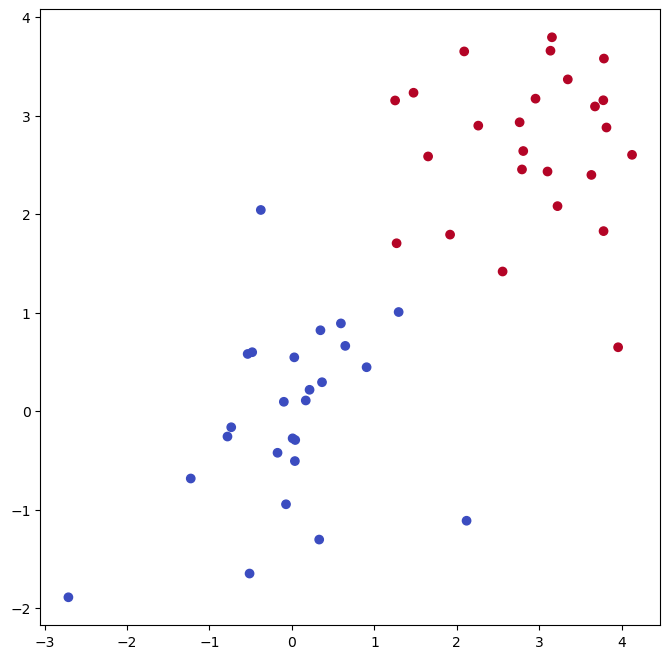

In [15]:
X[y==1] += 1.9
fig, ax = subplots(figsize=(8,8))
ax.scatter(X[:,0], X[:,1], c=y, cmap=cm.coolwarm)

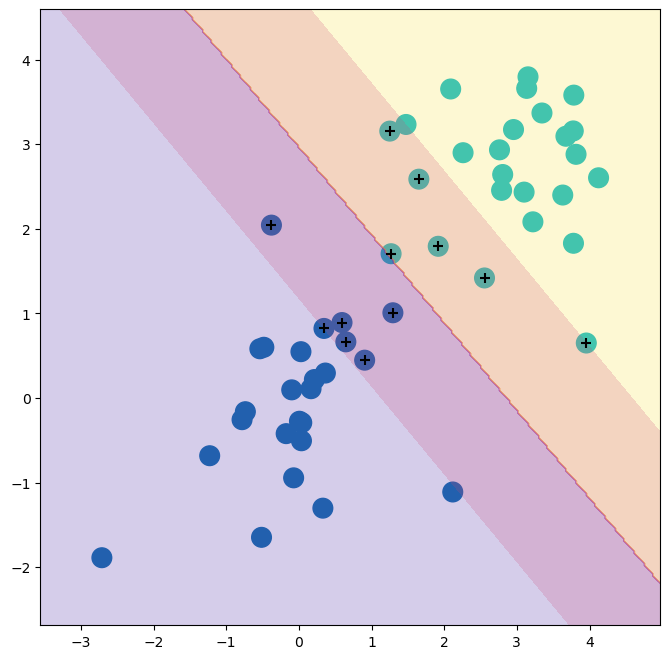

In [16]:
# Mit einem kleineren C wird der Rand größer - C: Regularisierungsparameter, großes C kleiner Regularisierung (inversly proportional)
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
svm_linear_small = SVC(C=0.1, kernel='linear')
svm_linear_small.fit(X, y)
fig, ax = subplots(figsize=(8,8))
plot_svm(X,
y,
svm_linear_small ,
ax=ax)

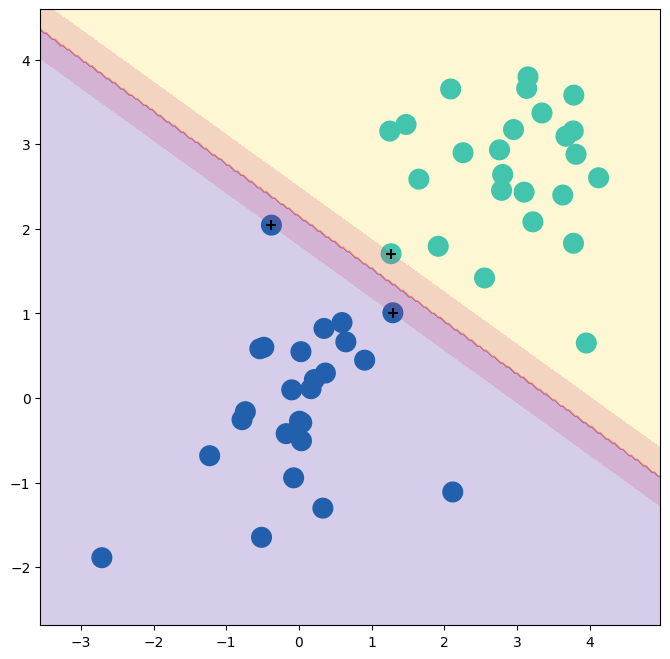

In [26]:
# Mit einem kleineren C wird die Entscheidungsgrenze größer
# Mit einem größeren C wird die Entscheidungsgrenze kleiner
svm_linear_small = SVC(C=1e9, kernel='linear')
svm_linear_small.fit(X, y)
fig, ax = subplots(figsize=(8,8))
plot_svm(X,
y,
svm_linear_small ,
ax=ax)

## Support Vector Machine

In [6]:
X = rng.standard_normal((200, 2))
X[:100] += 2
X[100:150] -= 2
y = np.array([1]*150+[2]*50)

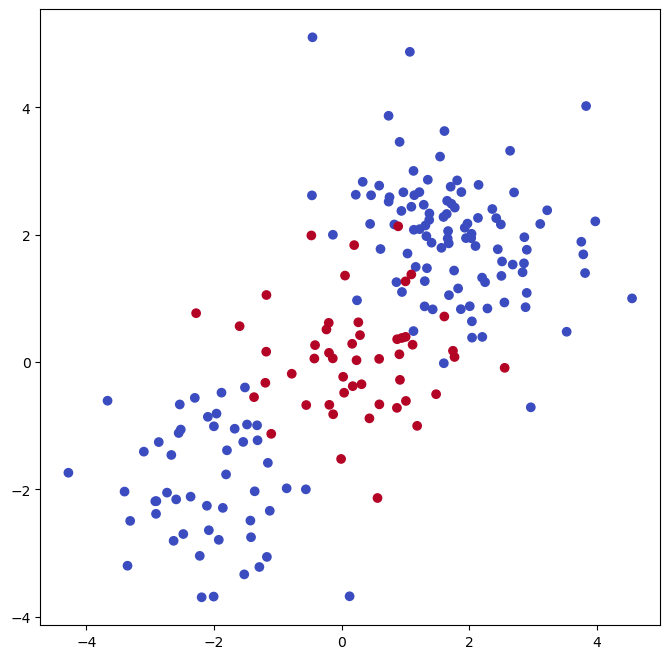

In [7]:
fig, ax = subplots(figsize=(8,8))
ax.scatter(X[:,0],
X[:,1],
c=y,
cmap=cm.coolwarm)

In [8]:
# SVM mit radialem Kern und Gamma=1 (rbf: radiale Basisfunktion)
(X_train , X_test , y_train , y_test) = skm.train_test_split(X, y, test_size=0.5, random_state=0)
svm_rbf = SVC(kernel="rbf", gamma=1, C=1)
svm_rbf.fit(X_train , y_train)

SVC(C=1, gamma=1)

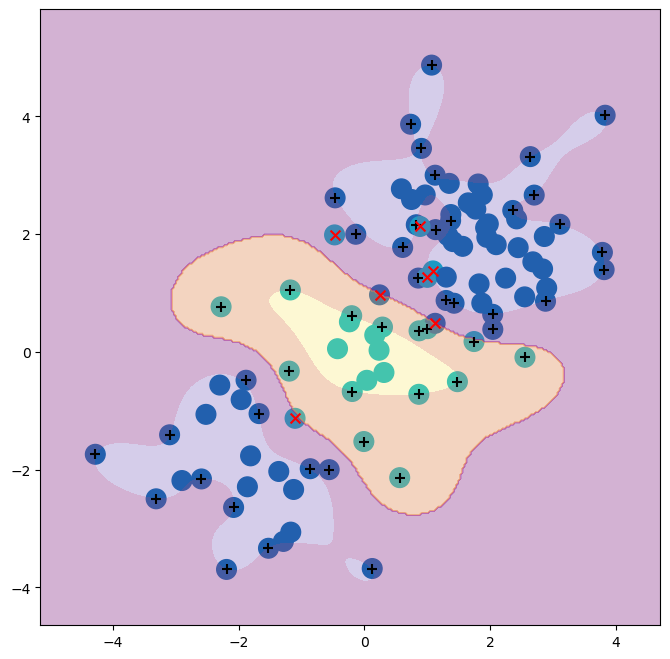

In [9]:
fig, ax = subplots(figsize=(8,8))
plot_svm(X_train , y_train , svm_rbf , ax=ax)

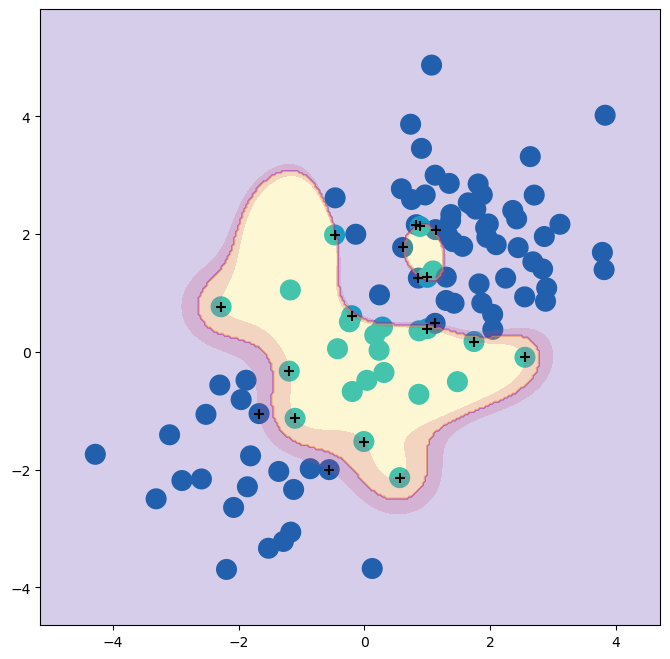

In [10]:
svm_rbf = SVC(kernel="rbf", gamma=1, C=1e5)
svm_rbf.fit(X_train , y_train)
fig, ax = subplots(figsize=(8,8))
plot_svm(X_train ,
y_train ,
svm_rbf ,
ax=ax)

In [16]:
kfold = skm.KFold(5,
random_state=0,
shuffle=True)
grid = skm.GridSearchCV(svm_rbf ,
{'C':[0.1,1,10,100,1000],
'gamma':[0.5,1,2,3,4]},
refit=True,
cv=kfold ,
scoring='accuracy');
grid.fit(X_train , y_train)
grid.best_params_

{'C': 100, 'gamma': 0.5}

Truth,1,2
Predicted,,
1,71,3
2,4,22


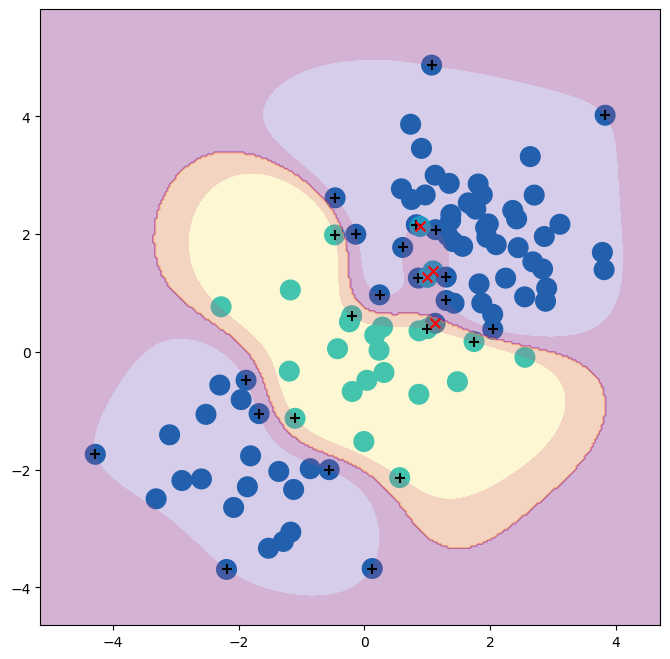

In [17]:
best_svm = grid.best_estimator_
fig, ax = subplots(figsize=(8,8))
plot_svm(X_train ,y_train ,best_svm ,ax=ax)
y_hat_test = best_svm.predict(X_test)
confusion_table(y_hat_test , y_test)

## Multiclass Classification

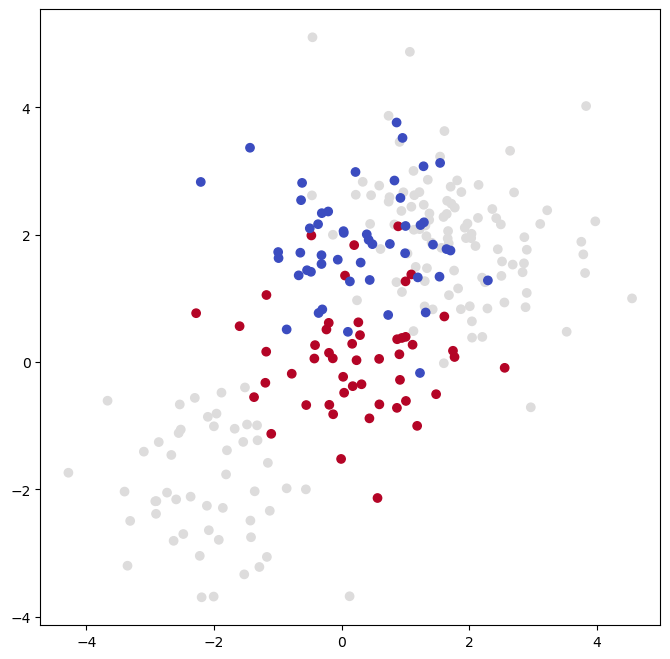

In [18]:
rng = np.random.default_rng(123)
X = np.vstack([X, rng.standard_normal((50, 2))])
y = np.hstack([y, [0]*50])
X[y==0,1] += 2
fig, ax = subplots(figsize=(8,8))
ax.scatter(X[:,0], X[:,1], c=y, cmap=cm.coolwarm);

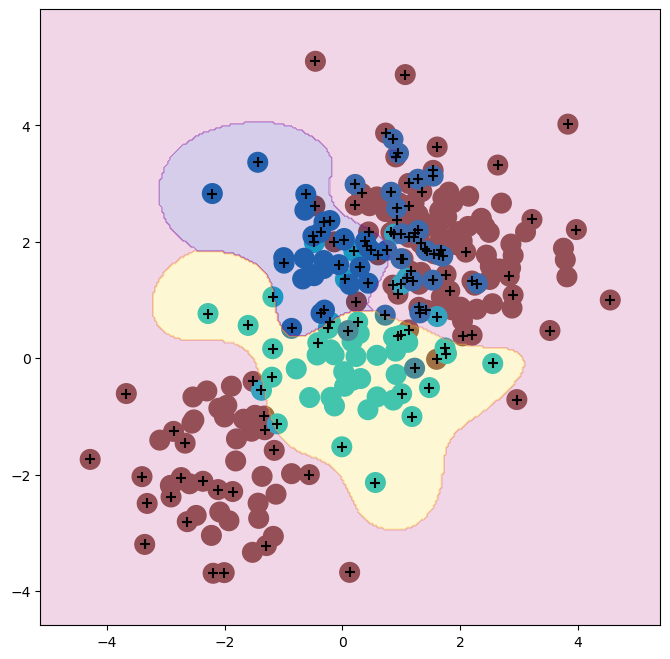

In [19]:
svm_rbf_3 = SVC(kernel="rbf", C=10, gamma=1, decision_function_shape='ovo'); # ovo: one-vs-one, ova: one-vs-all 
svm_rbf_3.fit(X, y)
fig, ax = subplots(figsize=(8,8))
plot_svm(X,y,svm_rbf_3 ,scatter_cmap=cm.tab10 ,ax=ax)

## Non-linear separation

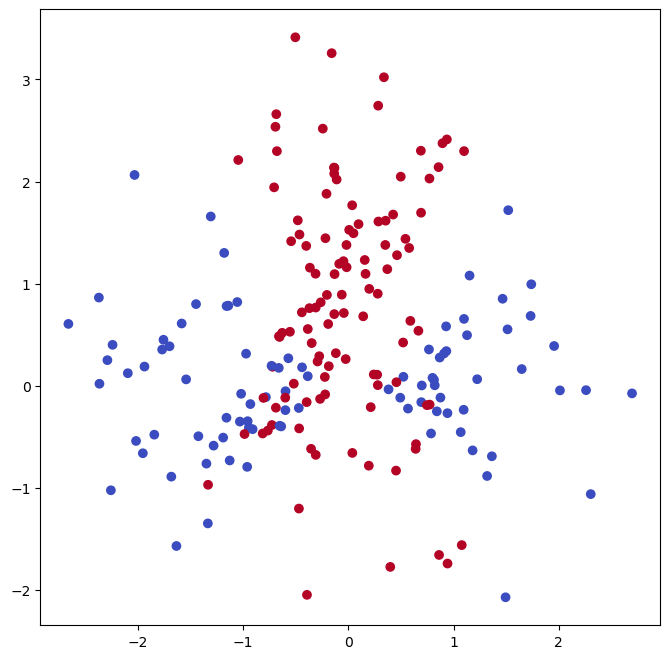

In [65]:
X = rng.standard_normal((200, 2))
y = abs(X[:,1])> X[:,0]**2
X[y==True,1] = X[y==True,1]+1
fig, ax = subplots(figsize=(8,8))
ax.scatter(X[:,0], X[:,1], c=y, cmap=cm.coolwarm)

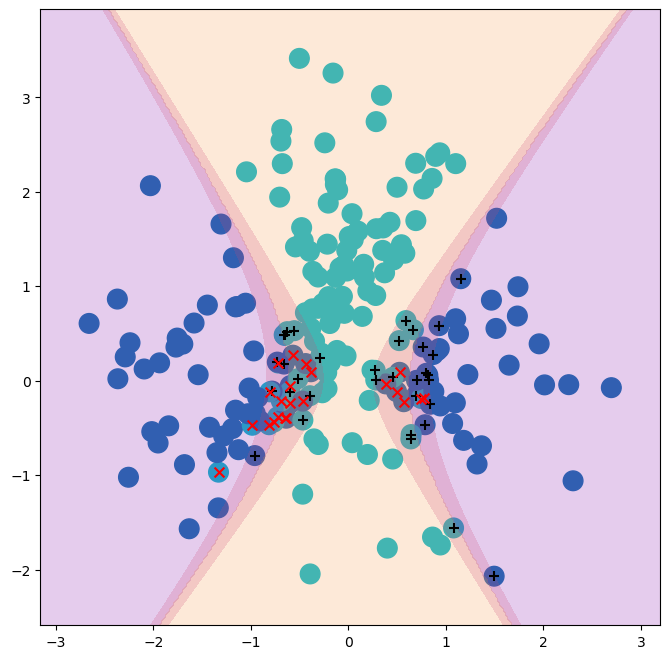

In [66]:
svm_poly = SVC(kernel="poly",degree=2, C=10)
svm_poly.fit(X, y)
fig, ax = subplots(figsize=(8,8))
plot_svm(X,y,svm_poly ,scatter_cmap=cm.tab10 ,ax=ax)